In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "plantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
)


Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[0 1 1 1 0 1 1 2 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 2 1]


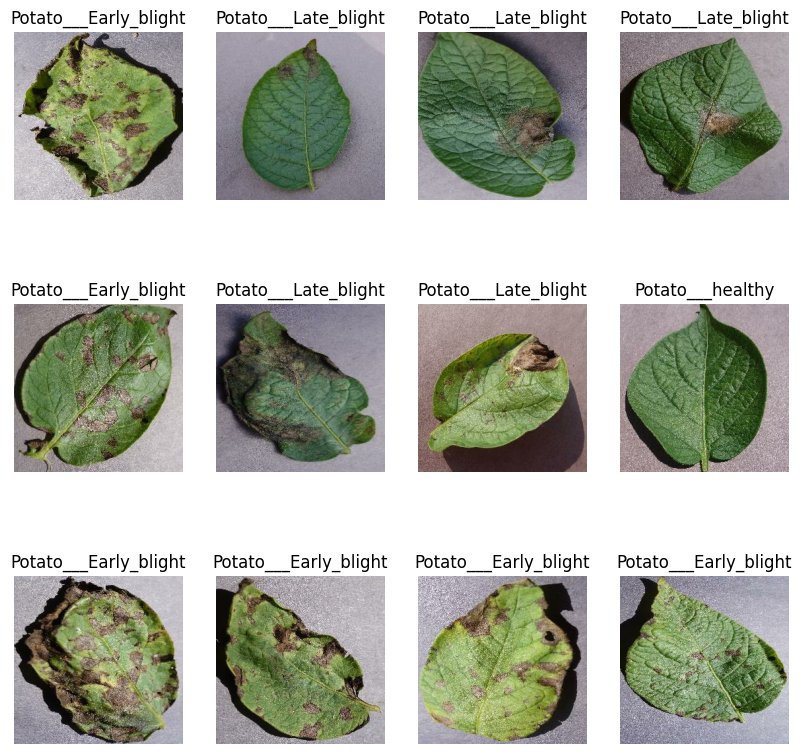

In [5]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [8]:
80% ==> Training
10% ==> Validation
10% ==> Test


SyntaxError: invalid syntax (1257392265.py, line 1)

In [7]:
train_size =0.8
len(dataset)*train_size


54.400000000000006

In [9]:
test_ds = dataset.skip(54)
len(test_ds)


14

In [10]:
val_size=0.1
len(dataset)*val_size


6.800000000000001

In [11]:
val_ds=test_ds.take(6)
len(val_ds)


6

In [12]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split) == 1
    
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
        
    train_size=int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds 
    

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)


[[[0.4392157  0.40392157 0.47058824]
  [0.3882353  0.3529412  0.41960785]
  [0.40784314 0.37254903 0.4392157 ]
  ...
  [0.6392157  0.62352943 0.68235296]
  [0.6313726  0.6156863  0.6745098 ]
  [0.6431373  0.627451   0.6862745 ]]

 [[0.45490196 0.41960785 0.4862745 ]
  [0.39607844 0.36078432 0.42745098]
  [0.40392157 0.36862746 0.43529412]
  ...
  [0.6392157  0.62352943 0.68235296]
  [0.6392157  0.62352943 0.68235296]
  [0.6509804  0.63529414 0.69411767]]

 [[0.45490196 0.41960785 0.4862745 ]
  [0.4        0.3647059  0.43137255]
  [0.41568628 0.38039216 0.44705883]
  ...
  [0.6392157  0.62352943 0.68235296]
  [0.64705884 0.6313726  0.6901961 ]
  [0.6627451  0.64705884 0.7058824 ]]

 ...

 [[0.5019608  0.47058824 0.5294118 ]
  [0.49411765 0.4627451  0.52156866]
  [0.48235294 0.4509804  0.50980395]
  ...
  [0.67058825 0.65882355 0.7019608 ]
  [0.6862745  0.6745098  0.7176471 ]
  [0.7019608  0.6901961  0.73333335]]

 [[0.5176471  0.4862745  0.54509807]
  [0.5019608  0.47058824 0.5294118 ]


In [27]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [28]:
 data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [36]:
IMAGE_SIZE

256

In [32]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 390s 7s/step - loss: 0.4480 - accuracy: 0.8189 - val_loss: 0.3168 - val_accuracy: 0.8582
Epoch 2/50
54/54 [==============================] - 404s 8s/step - loss: 0.3462 - accuracy: 0.8588 - val_loss: 0.2473 - val_accuracy: 0.8993
Epoch 3/50
54/54 [==============================] - 555s 10s/step - loss: 0.2062 - accuracy: 0.9161 - val_loss: 0.1885 - val_accuracy: 0.9392
Epoch 4/50
54/54 [==============================] - 354s 7s/step - loss: 0.1679 - accuracy: 0.9294 - val_loss: 0.1806 - val_accuracy: 0.9288
Epoch 5/50
54/54 [==============================] - 342s 6s/step - loss: 0.1657 - accuracy: 0.9363 - val_loss: 0.1517 - val_accuracy: 0.9508
Epoch 6/50
54/54 [==============================] - 345s 6s/step - loss: 0.1134 - accuracy: 0.9520 - val_loss: 0.1217 - val_accuracy: 0.9520
Epoch 7/50
54/54 [==============================] - 344s 6s/step - loss: 0.0858 - accuracy: 0.9693 - val_loss: 0.0393 - val_accuracy: 0.9855
Epoch 8/50
5

In [38]:
scores = model.evaluate(test_ds)

54/54 [==============================] - 77s 1s/step - loss: 5.2859e-06 - accuracy: 1.0000


In [39]:
 scores

[5.285937277221819e-06, 1.0]

In [40]:
history

In [41]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
type(history.history['loss'])

list

In [44]:
len(history.history['loss'])

50

In [45]:
history.history['loss'][:5]

[0.4480431377887726,
 0.34622249007225037,
 0.2061631977558136,
 0.16791515052318573,
 0.16569356620311737]

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

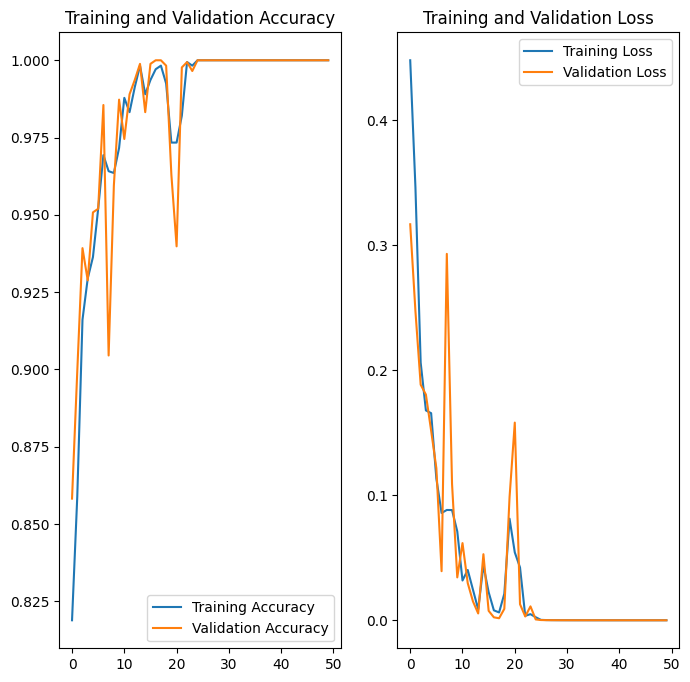

In [47]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 4s 4s/step
predicted label: Potato___Early_blight


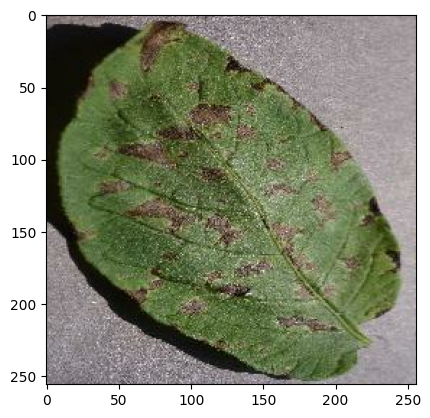

In [48]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 87ms/step


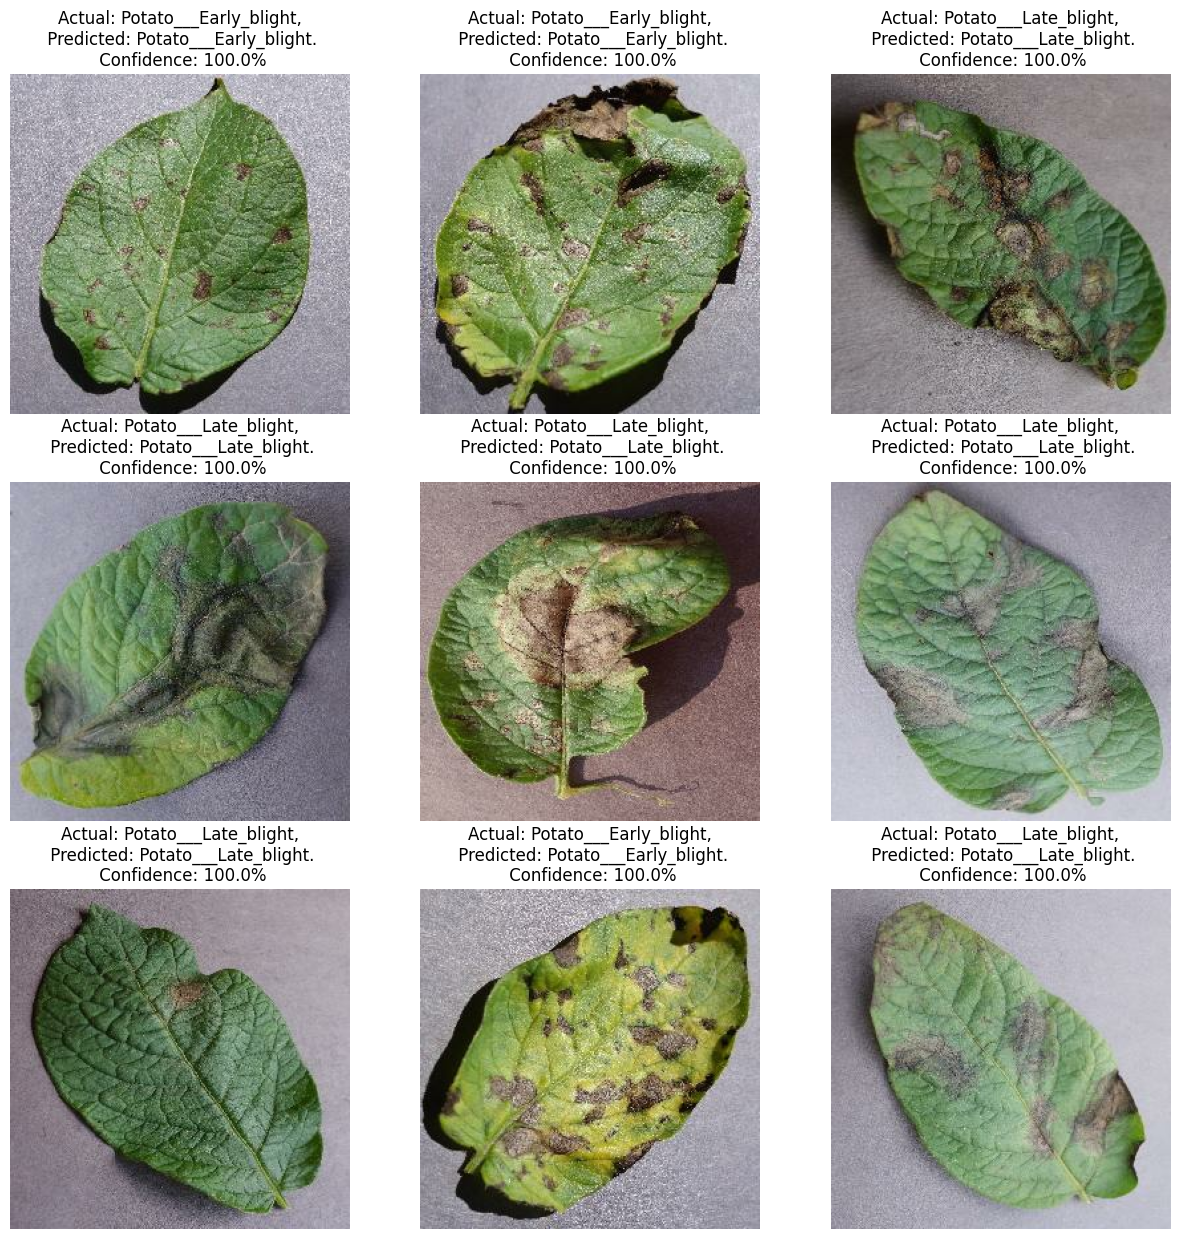

In [50]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [51]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
